In [ ]:
# Import delle librerie principali
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙Configurazione visuale (opzionale ma utile)
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

# Caricamento del dataset
file_path = r"C:\Users\frast\Desktop\blood.csv"
df = pd.read_csv(file_path)

# Visualizzazione iniziale
df.head()


,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [1]:
# Rinomina delle colonne per maggiore chiarezza
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']

# Conversione del target: 1 = non ha donato, 2 = ha donato → trasformiamo in 0 e 1
df['Target'] = df['Target'].map({1: 0, 2: 1})

# Controllo delle prime righe per confermare la trasformazione
df.head()


,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
# Verifica della correlazione tra Monetary e Frequency
correlation = df[['Monetary', 'Frequency']].corr()
print("Correlazione tra Monetary e Frequency:")
print(correlation)

# Controllo se Monetary è strettamente proporzionale a Frequency
df['Monetary_per_donation'] = df['Monetary'] / df['Frequency']
print("\nValori unici di cc per donazione:")
print(df['Monetary_per_donation'].unique())


Correlazione tra Monetary e Frequency:
           Monetary  Frequency
Monetary        1.0        1.0
Frequency       1.0        1.0

Valori unici di cc per donazione:
[250.]


In [3]:
# Rimozione della variabile ridondante
df.drop(columns=['Monetary', 'Monetary_per_donation'], inplace=True)

# Verifica struttura attuale
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Time       748 non-null    int64
 3   Target     748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


In [4]:
# Variable dictionary
variable_info = {
    "Recency": {
        "Full Name": "Months since last donation",
        "Type": "Integer",
        "Unit": "Months",
        "Description": "Lower values indicate more recent donors"
    },
    "Frequency": {
        "Full Name": "Total number of donations",
        "Type": "Integer",
        "Unit": "Donations",
        "Description": "Each donation is approximately 250 cc of blood"
    },
    "Time": {
        "Full Name": "Months since first donation",
        "Type": "Integer",
        "Unit": "Months",
        "Description": "Seniority of the donor in months"
    },
    "Target": {
        "Full Name": "Donated in March 2007",
        "Type": "Binary (0 = No, 1 = Yes)",
        "Unit": "Category",
        "Description": "Binary target variable indicating donation status"
    }
}

# Display as a DataFrame for clarity
pd.DataFrame(variable_info).T


,Full Name,Type,Unit,Description
Recency,Months since last donation,Integer,Months,Lower values indicate more recent donors
Frequency,Total number of donations,Integer,Donations,Each donation is approximately 250 cc of blood
Time,Months since first donation,Integer,Months,Seniority of the donor in months
Target,Donated in March 2007,"Binary (0 = No, 1 = Yes)",Category,Binary target variable indicating donation status


In [5]:
import pandas as pd

# Definizione delle unità di misura delle variabili
data = {
    "Variable": ["Recency", "Frequency", "Time", "Target"],
    "Unit of Measure": [
        "Interi (mesi dall'ultima donazione)",
        "Interi (numero totale di donazioni effettuate)",
        "Interi (mesi dalla prima donazione)",
        "Dichiarativo binario (0 = non ha donato, 1 = ha donato a marzo 2007)"
    ]
}

unit_df = pd.DataFrame(data)

unit_df


,Variable,Unit of Measure
0,Recency,Interi (mesi dall'ultima donazione)
1,Frequency,Interi (numero totale di donazioni effettuate)
2,Time,Interi (mesi dalla prima donazione)
3,Target,"Dichiarativo binario (0 = non ha donato, 1 = h..."


In [6]:
import pandas as pd

# Informazioni sulle variabili
data = {
    "Variable": ["Recency", "Frequency", "Time", "Target"],
    "Variable Type": [
        "Numeric",
        "Numeric",
        "Numeric",
        "Binary Categorical"
    ],
    "Unit of Measure": [
        "Mesi (mesi dall'ultima donazione)",
        "Conteggio (numero totale di donazioni effettuate)",
        "Mesi (mesi dalla prima donazione)",
        "Categoria binaria (0 = non ha donato, 1 = ha donato a marzo 2007)"
    ]
}

variable_df = pd.DataFrame(data)

variable_df


,Variable,Variable Type,Unit of Measure
0,Recency,Numeric,Mesi (mesi dall'ultima donazione)
1,Frequency,Numeric,Conteggio (numero totale di donazioni effettuate)
2,Time,Numeric,Mesi (mesi dalla prima donazione)
3,Target,Binary Categorical,"Categoria binaria (0 = non ha donato, 1 = ha d..."


In [7]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\frast\Desktop\blood.csv"
df = pd.read_csv(file_path)

# Rename columns for clarity
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']

# Convert the target variable to binary (0 = did not donate, 1 = donated)
df['Target'] = df['Target'].map({1: 0, 2: 1})

# Drop the redundant 'Monetary' column
df.drop(columns=['Monetary'], inplace=True)

# Generate and display descriptive statistics
desc_df = df.describe().T
desc_df


,count,mean,std,min,25%,50%,75%,max
Recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Target,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


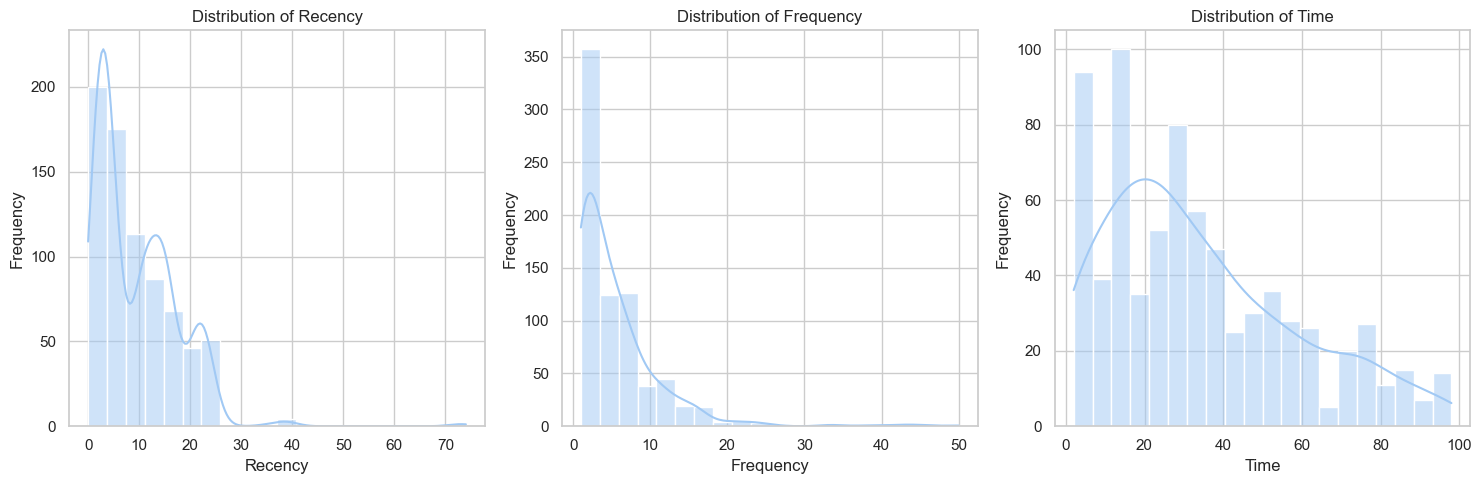

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

# Rename columns
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Define quantitative variables
quantitative_vars = ['Recency', 'Frequency', 'Time']

# Plot distributions
plt.figure(figsize=(15, 5))

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


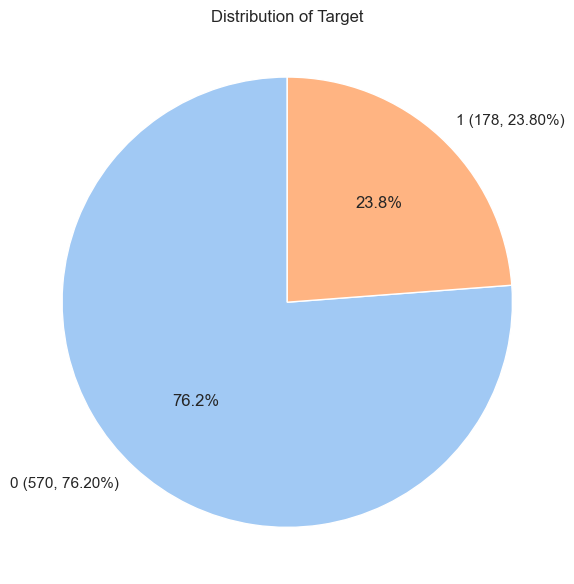

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

# Rename columns and clean
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})  # 0 = Did not donate, 1 = Donated
df.drop(columns=['Monetary'], inplace=True)

# Categorical binary variables (in this dataset only 'Target')
categorical_vars = ['Target']

# Calculate frequencies and percentages
results = {}
for var in categorical_vars:
    frequencies = df[var].value_counts()
    percentages = frequencies / len(df) * 100
    results[var] = {'frequencies': frequencies, 'percentages': percentages}

# Plot pie charts
fig, axs = plt.subplots(1, len(categorical_vars), figsize=(6 * len(categorical_vars), 6))

if len(categorical_vars) == 1:
    axs = [axs]  # Ensure axs is iterable

for i, var in enumerate(categorical_vars):
    frequencies = results[var]['frequencies']
    percentages = results[var]['percentages']
    labels = [f'{label} ({freq}, {percent:.2f}%)' for label, freq, percent in zip(frequencies.index, frequencies, percentages)]

    axs[i].pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Distribution of {var}')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()


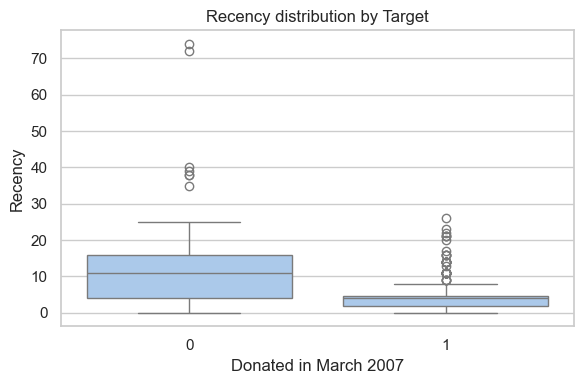

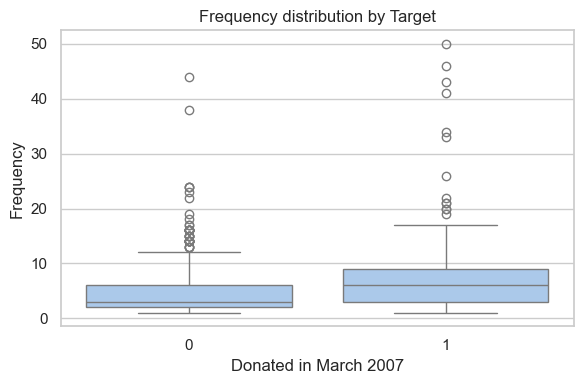

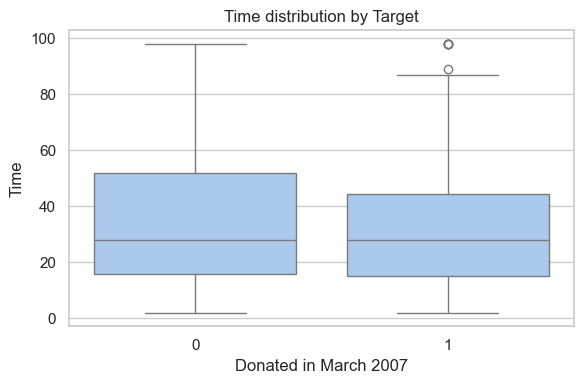

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_vars = ['Recency', 'Frequency', 'Time']

for var in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Target', y=var, data=df)
    plt.title(f'{var} distribution by Target')
    plt.xlabel('Donated in March 2007')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


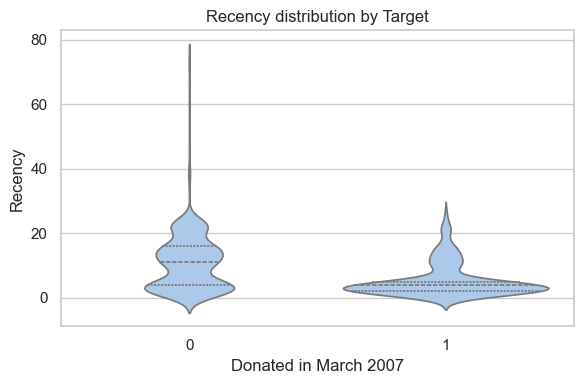

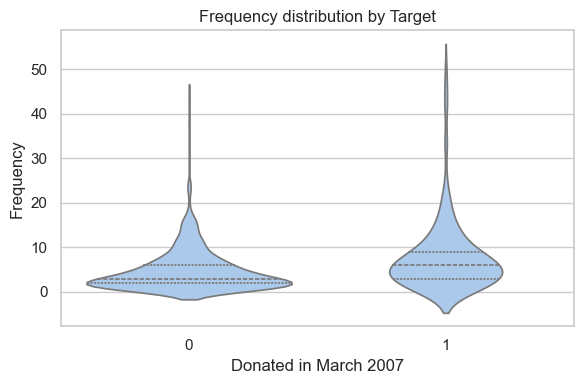

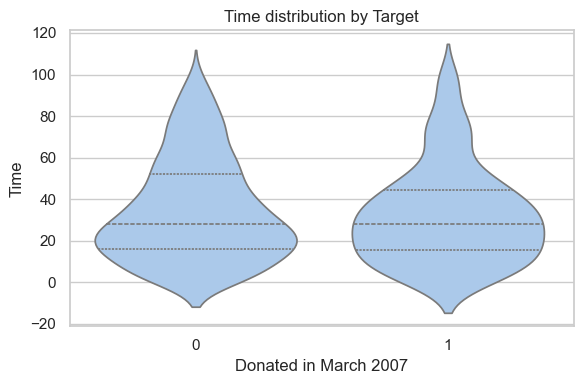

In [11]:
for var in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Target', y=var, data=df, inner='quartile')
    plt.title(f'{var} distribution by Target')
    plt.xlabel('Donated in March 2007')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_13476\480546662.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Recency_group', 'Target']).size().unstack().fillna(0)


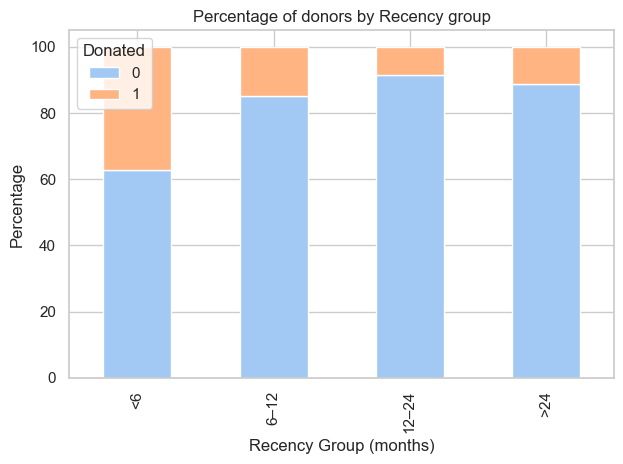

In [12]:
# Example: Percentage of donors by Recency group
df['Recency_group'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], labels=['<6', '6–12', '12–24', '>24'])

grouped = df.groupby(['Recency_group', 'Target']).size().unstack().fillna(0)
percent_df = grouped.div(grouped.sum(axis=1), axis=0) * 100

percent_df.plot(kind='bar', stacked=True)
plt.title('Percentage of donors by Recency group')
plt.ylabel('Percentage')
plt.xlabel('Recency Group (months)')
plt.legend(title='Donated')
plt.tight_layout()
plt.show()


<Axes: xlabel='Target', ylabel='Recency'>

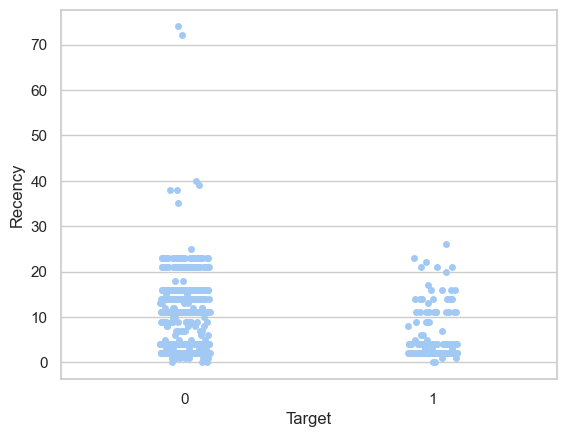

In [13]:
sns.stripplot(x='Target', y='Recency', data=df, jitter=True)


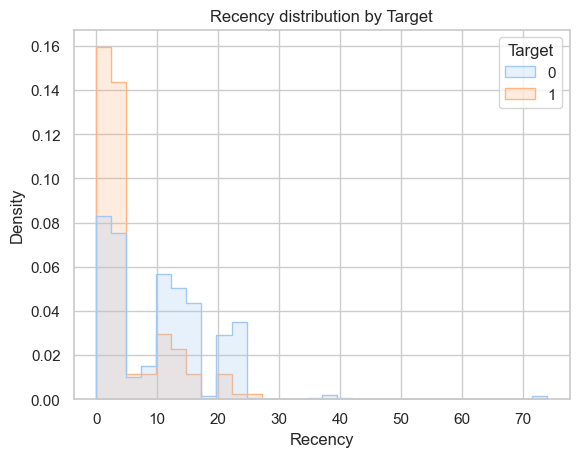

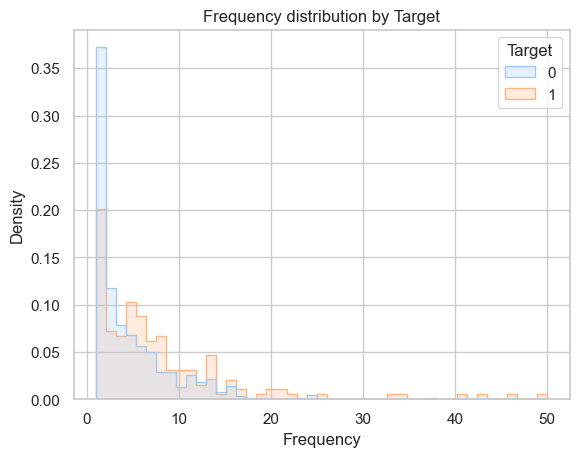

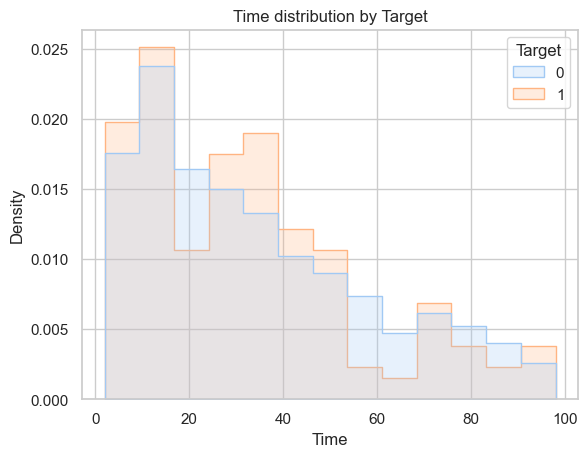

In [15]:
for var in ['Recency', 'Frequency', 'Time']:
    sns.histplot(data=df, x=var, hue='Target', element='step', stat='density', common_norm=False)
    plt.title(f'{var} distribution by Target')
    plt.show()


<Axes: xlabel='Target', ylabel='Frequency'>

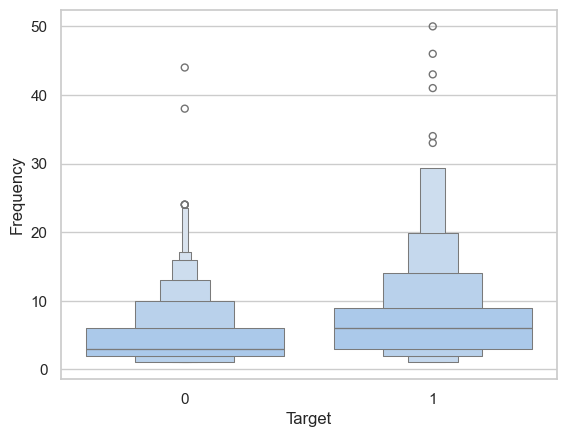

In [16]:
sns.boxenplot(x='Target', y='Frequency', data=df)


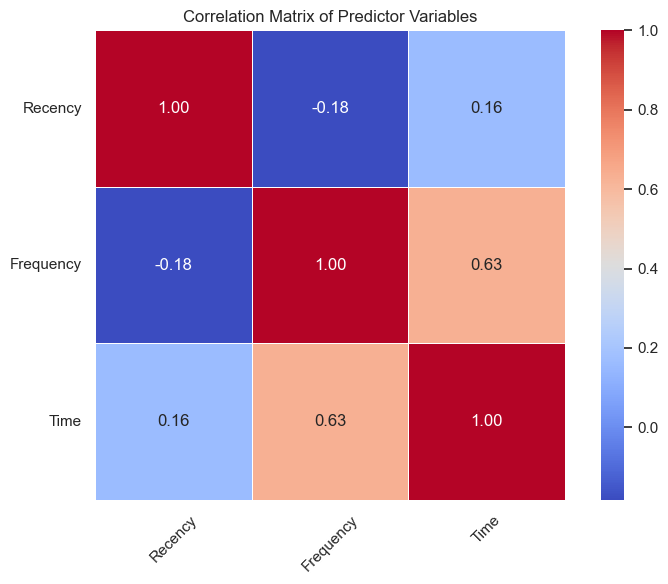

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

# Rename columns and clean
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Compute correlation matrix for features only (excluding Target)
feature_corr = df.drop(columns=['Target']).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(feature_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [20]:
from scipy.stats import zscore

z_scores = df[['Recency', 'Frequency', 'Time']].apply(zscore)
outliers = (abs(z_scores) > 3).sum()
print("Number of outliers per variable (Z-score > 3):\n", outliers)


Number of outliers per variable (Z-score > 3):
 Recency       7
Frequency    12
Time          0
dtype: int64


In [21]:
Q1 = df[['Recency', 'Frequency', 'Time']].quantile(0.25)
Q3 = df[['Recency', 'Frequency', 'Time']].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[['Recency', 'Frequency', 'Time']] < (Q1 - 1.5 * IQR)) |
                (df[['Recency', 'Frequency', 'Time']] > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers per variable (IQR method):\n", outliers_iqr)


Number of outliers per variable (IQR method):
 Recency       7
Frequency    45
Time          0
dtype: int64


In [22]:
df['DonationRate'] = df['Frequency'] / df['Time']


In [23]:
df['RecencyRatio'] = df['Recency'] / df['Time']


In [24]:
df['RecencyLevel'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], labels=['<6', '6–12', '12–24', '>24'])
df['FrequencyLevel'] = pd.cut(df['Frequency'], bins=[0, 2, 5, 10, 50], labels=['Very Low', 'Low', 'Medium', 'High'])


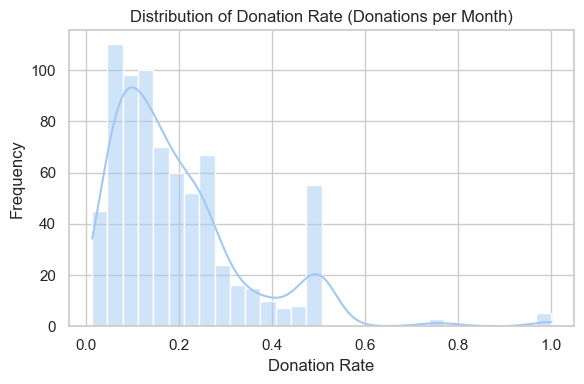

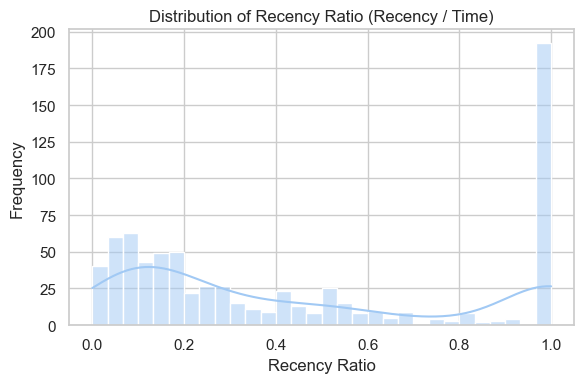

C:\Users\frast\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


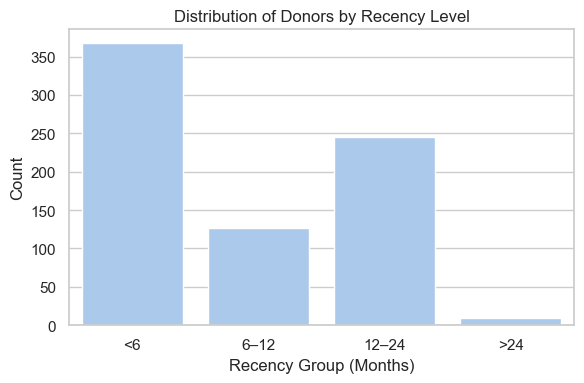

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the dataset
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Feature 1: DonationRate = Frequency / Time
df['DonationRate'] = df['Frequency'] / df['Time']

# Feature 2: RecencyRatio = Recency / Time
df['RecencyRatio'] = df['Recency'] / df['Time']

# Feature 3: RecencyLevel = binned version of Recency
df['RecencyLevel'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], 
                            labels=['<6', '6–12', '12–24', '>24'])

# ---------------------- #
# Visualization
# ---------------------- #

# 1. Donation Rate distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['DonationRate'], bins=30, kde=True)
plt.title('Distribution of Donation Rate (Donations per Month)')
plt.xlabel('Donation Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Recency Ratio distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['RecencyRatio'], bins=30, kde=True)
plt.title('Distribution of Recency Ratio (Recency / Time)')
plt.xlabel('Recency Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Recency Level barplot (categorical)
plt.figure(figsize=(6, 4))
sns.countplot(x='RecencyLevel', data=df, order=['<6', '6–12', '12–24', '>24'])
plt.title('Distribution of Donors by Recency Level')
plt.xlabel('Recency Group (Months)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
C:\Users\frast\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
C:\Users\frast\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


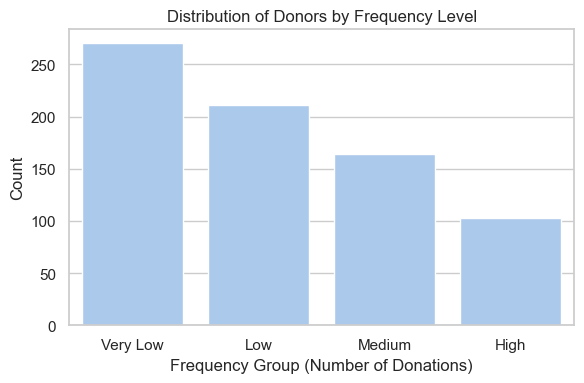

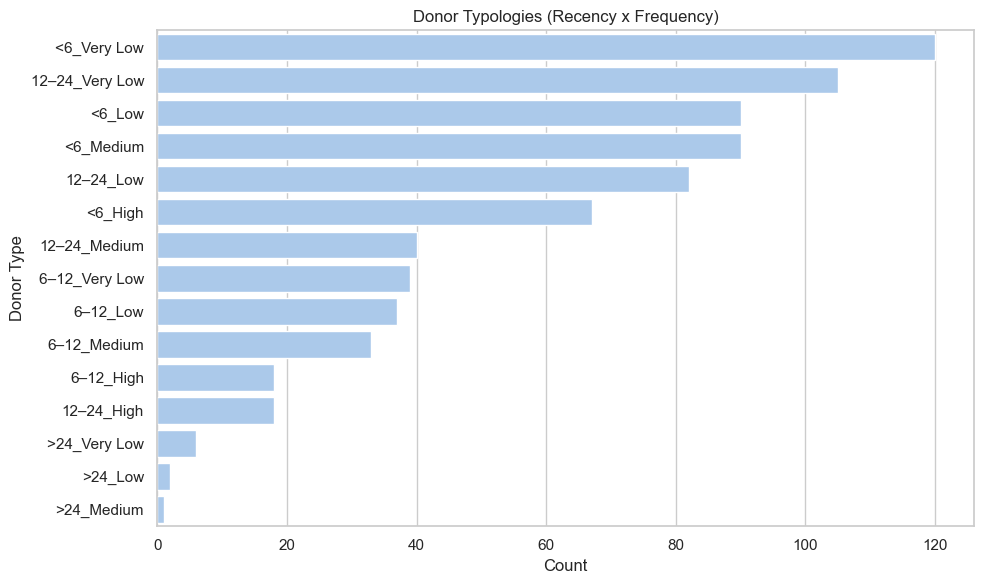

In [27]:
# 4. FrequencyLevel: binned version of Frequency
df['FrequencyLevel'] = pd.cut(df['Frequency'],
                              bins=[0, 2, 5, 10, 50],
                              labels=['Very Low', 'Low', 'Medium', 'High'])

# 5. DonorType: combination of RecencyLevel and FrequencyLevel
df['DonorType'] = df['RecencyLevel'].astype(str) + "_" + df['FrequencyLevel'].astype(str)

# ---------------------- #
# Visualization
# ---------------------- #

# Frequency Level - countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='FrequencyLevel', data=df, order=['Very Low', 'Low', 'Medium', 'High'])
plt.title('Distribution of Donors by Frequency Level')
plt.xlabel('Frequency Group (Number of Donations)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# DonorType - countplot (ordered by frequency)
plt.figure(figsize=(10, 6))
order = df['DonorType'].value_counts().index
sns.countplot(y='DonorType', data=df, order=order)
plt.title('Donor Typologies (Recency x Frequency)')
plt.xlabel('Count')
plt.ylabel('Donor Type')
plt.tight_layout()
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

# Reload and prepare dataset (just to be safe)
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Feature engineering
df['DonationRate'] = df['Frequency'] / df['Time']
df['RecencyRatio'] = df['Recency'] / df['Time']
df['RecencyLevel'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], labels=['<6', '6–12', '12–24', '>24'])
df['FrequencyLevel'] = pd.cut(df['Frequency'], bins=[0, 2, 5, 10, 50], labels=['Very Low', 'Low', 'Medium', 'High'])

# Variables for clustering
features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio', 'RecencyLevel', 'FrequencyLevel']

# Separate numerical and categorical features
numeric_features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']
categorical_features = ['RecencyLevel', 'FrequencyLevel']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Apply transformations
X_preprocessed = preprocessor.fit_transform(df[features])


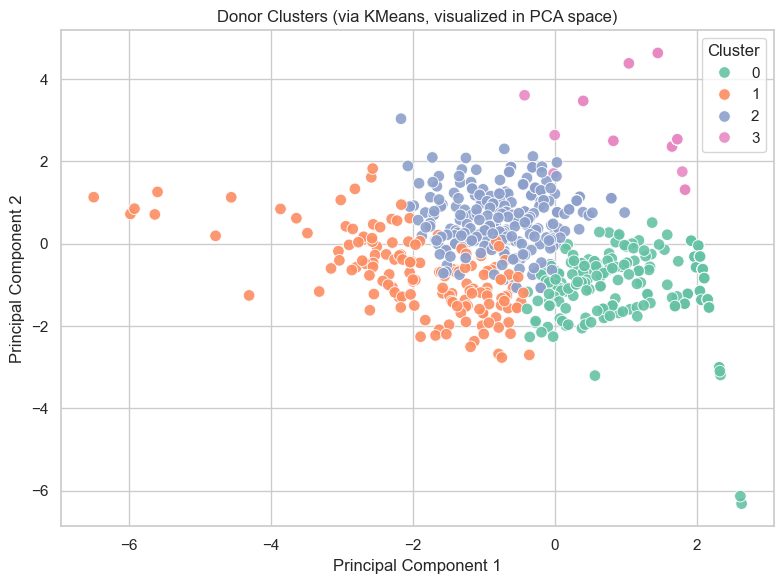

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Reload and preprocess dataset
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Feature engineering
df['DonationRate'] = df['Frequency'] / df['Time']
df['RecencyRatio'] = df['Recency'] / df['Time']
df['RecencyLevel'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], labels=['<6', '6–12', '12–24', '>24'])
df['FrequencyLevel'] = pd.cut(df['Frequency'], bins=[0, 2, 5, 10, 50], labels=['Very Low', 'Low', 'Medium', 'High'])

# Feature selection
features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio', 'RecencyLevel', 'FrequencyLevel']
numeric_features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']
categorical_features = ['RecencyLevel', 'FrequencyLevel']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Transform data
X = preprocessor.fit_transform(df[features])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# PCA for 2D projection
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot PCA-reduced space with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', s=70, alpha=0.9)
plt.title('Donor Clusters (via KMeans, visualized in PCA space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import numpy as np

# Group by cluster and calculate mean of numerical variables
cluster_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']].mean().round(2)
print("Cluster-wise Mean Values:\n")
print(cluster_summary)

# Optional: count of observations per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of donors per cluster:\n")
print(cluster_counts)

# Optional: distribution of Target per cluster
target_distribution = df.groupby('Cluster')['Target'].value_counts(normalize=True).unstack().fillna(0).round(3) * 100
target_distribution.columns = ['Not Donated (%)', 'Donated (%)']
print("\nPercentage of Donors vs Non-Donors in each Cluster:\n")
print(target_distribution)

# Optional: distribution of RecencyLevel and FrequencyLevel per cluster
print("\nRecency Level distribution by Cluster:\n")
print(pd.crosstab(df['Cluster'], df['RecencyLevel'], normalize='index').round(2) * 100)

print("\nFrequency Level distribution by Cluster:\n")
print(pd.crosstab(df['Cluster'], df['FrequencyLevel'], normalize='index').round(2) * 100)


Cluster-wise Mean Values:

         Recency  Frequency   Time  DonationRate  RecencyRatio
Cluster                                                       
0          17.28       2.47  26.37          0.10          0.74
1          10.06      12.37  70.62          0.18          0.15
2           3.92       5.91  31.68          0.21          0.15
3           3.01       1.42   3.36          0.44          0.93

Number of donors per cluster:

Cluster
0    249
1    153
2    251
3     95
Name: count, dtype: int64

Percentage of Donors vs Non-Donors in each Cluster:

         Not Donated (%)  Donated (%)
Cluster                              
0                   90.0         10.0
1                   77.1         22.9
2                   62.5         37.5
3                   74.7         25.3

Recency Level distribution by Cluster:

RecencyLevel    <6  6–12  12–24  >24
Cluster                             
0              0.0  21.0   76.0  4.0
1             35.0  29.0   35.0  0.0
2             87.0  12

In [31]:
# Profilo sintetico con statistiche rilevanti
summary_vars = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']
cluster_profile = df.groupby('Cluster')[summary_vars].mean().round(2)

# Aggiungi anche il numero di individui per cluster
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()

# Ordina per numero di osservazioni (opzionale)
cluster_profile = cluster_profile.sort_values(by='Count', ascending=False)

# Visualizzazione tabella con stile
styled_table = cluster_profile.style.background_gradient(cmap='YlGnBu').format("{:.2f}")
styled_table


,Recency,Frequency,Time,DonationRate,RecencyRatio,Count
Cluster,,,,,,
2,3.92,5.91,31.68,0.21,0.15,251.00
0,17.28,2.47,26.37,0.10,0.74,249.00
1,10.06,12.37,70.62,0.18,0.15,153.00
3,3.01,1.42,3.36,0.44,0.93,95.00


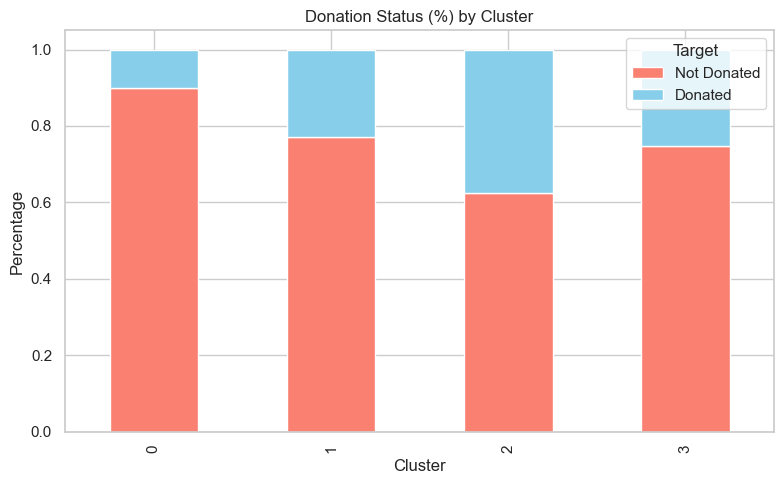

In [32]:
# Calcolo distribuzione target
target_dist = df.groupby('Cluster')['Target'].value_counts(normalize=True).unstack().fillna(0)

# Visualizza con barplot
target_dist.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 5))
plt.title('Donation Status (%) by Cluster')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.legend(title='Target', labels=['Not Donated', 'Donated'])
plt.tight_layout()
plt.show()


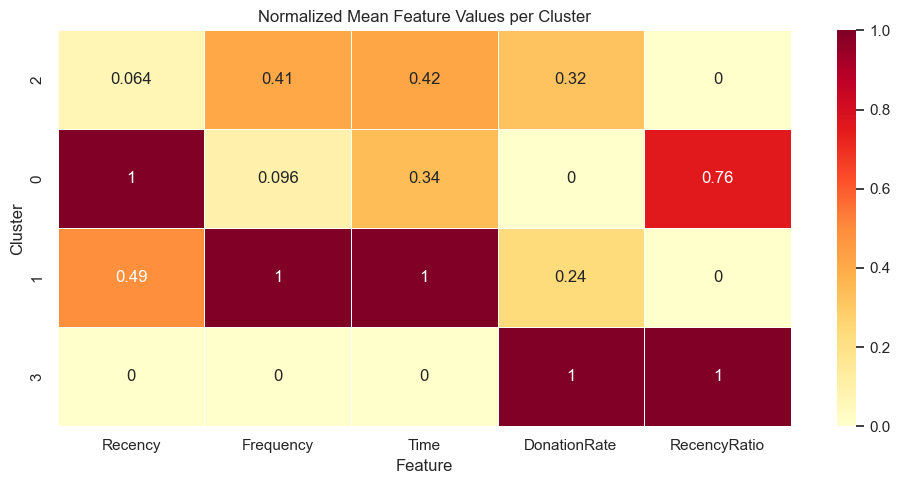

In [33]:
# Heatmap dei valori medi normalizzati
normed = cluster_profile[summary_vars].copy()
normed = (normed - normed.min()) / (normed.max() - normed.min())  # min-max normalization

plt.figure(figsize=(10, 5))
sns.heatmap(normed, annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title('Normalized Mean Feature Values per Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Feature engineering
df['DonationRate'] = df['Frequency'] / df['Time']
df['RecencyRatio'] = df['Recency'] / df['Time']
df['RecencyLevel'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], labels=['<6', '6–12', '12–24', '>24'])
df['FrequencyLevel'] = pd.cut(df['Frequency'], bins=[0, 2, 5, 10, 50], labels=['Very Low', 'Low', 'Medium', 'High'])

# Define features and target
X = df[['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio', 'RecencyLevel', 'FrequencyLevel']]
y = df['Target']

# Preprocessing: scale numeric, encode categorical
numeric_features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']
categorical_features = ['RecencyLevel', 'FrequencyLevel']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Fit model
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_processed, y_train)

# Predictions
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]


Classification Report:

              precision    recall  f1-score   support

           0      0.808     0.936     0.867       171
           1      0.593     0.296     0.395        54

    accuracy                          0.782       225
   macro avg      0.700     0.616     0.631       225
weighted avg      0.756     0.782     0.754       225



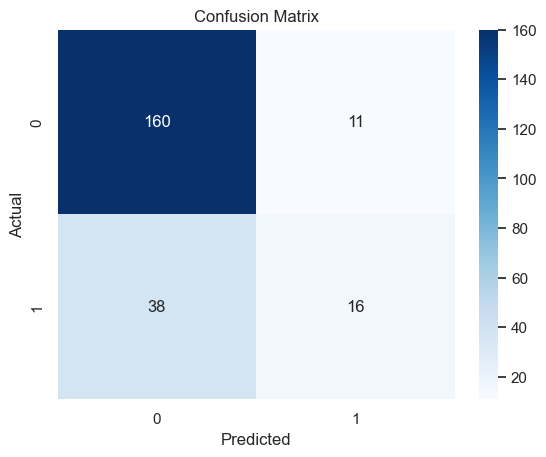

ROC AUC Score: 0.770


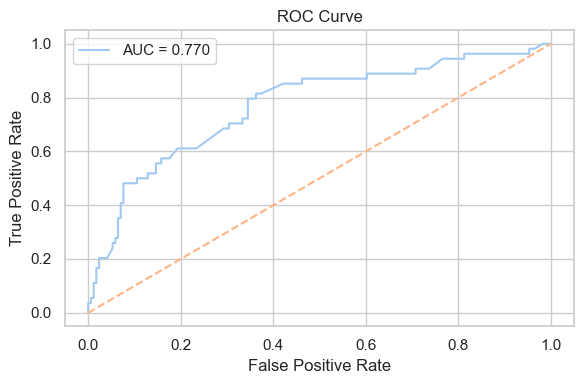

In [36]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc:.3f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# Get feature names
feature_names_num = numeric_features
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(feature_names_num) + list(feature_names_cat)

# Coefficienti
coefficients = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Logistic Regression Coefficients (sorted by absolute value):")
print(coefficients)


Logistic Regression Coefficients (sorted by absolute value):
                    Feature  Coefficient
10  FrequencyLevel_Very Low    -0.714278
2                      Time    -0.625183
7          RecencyLevel_>24     0.611015
1                 Frequency     0.547172
6           RecencyLevel_<6     0.501641
9     FrequencyLevel_Medium     0.365497
0                   Recency    -0.332292
8        FrequencyLevel_Low     0.214413
3              DonationRate     0.141047
4              RecencyRatio    -0.130767
5         RecencyLevel_6–12     0.031136



Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       113
           1       0.58      0.30      0.39        37

    accuracy                           0.77       150
   macro avg       0.69      0.61      0.63       150
weighted avg       0.75      0.77      0.75       150


Confusion Matrix:

[[105   8]
 [ 26  11]]

ROC AUC Score: 0.674


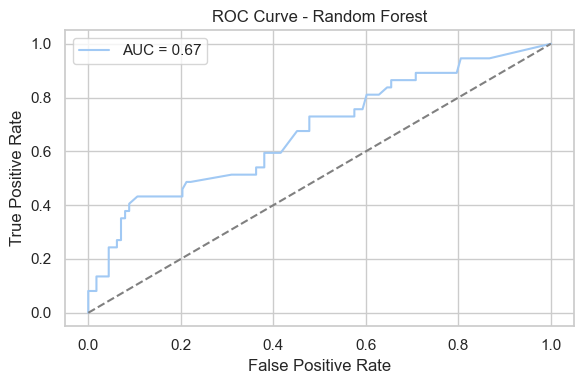

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare dataset
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Feature engineering
df['DonationRate'] = df['Frequency'] / df['Time']
df['RecencyRatio'] = df['Recency'] / df['Time']
df['RecencyLevel'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], labels=['<6', '6–12', '12–24', '>24'])
df['FrequencyLevel'] = pd.cut(df['Frequency'], bins=[0, 2, 5, 10, 50], labels=['Very Low', 'Low', 'Medium', 'High'])

# Feature selection
features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio', 'RecencyLevel', 'FrequencyLevel']
X = df[features]
y = df['Target']

# Preprocessing
numeric_features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']
categorical_features = ['RecencyLevel', 'FrequencyLevel']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Pipeline: preprocessing + Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba).round(3))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


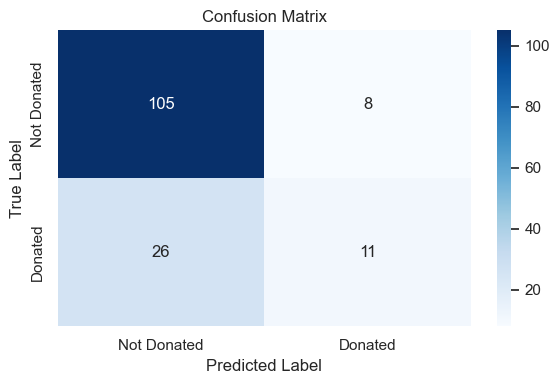

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix con nomi di classe personalizzati
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Donated', 'Donated'], yticklabels=['Not Donated', 'Donated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import classification_report
import pandas as pd

# Convert classification report in dict → DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Visualizza con formattazione
report_df.style.background_gradient(cmap='YlGnBu').format("{:.2f}")


,precision,recall,f1-score,support
0,0.80,0.93,0.86,113.00
1,0.58,0.30,0.39,37.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.69,0.61,0.63,150.00
weighted avg,0.75,0.77,0.75,150.00



Feature Importances (Random Forest):

                    Feature  Importance
3              DonationRate      0.2619
4              RecencyRatio      0.2213
2                      Time      0.1719
1                 Frequency      0.1261
0                   Recency      0.1174
6           RecencyLevel_<6      0.0423
8        FrequencyLevel_Low      0.0172
9     FrequencyLevel_Medium      0.0165
10  FrequencyLevel_Very Low      0.0140
5         RecencyLevel_6–12      0.0091
7          RecencyLevel_>24      0.0023


C:\Users\frast\AppData\Local\Temp\ipykernel_13476\4094959086.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


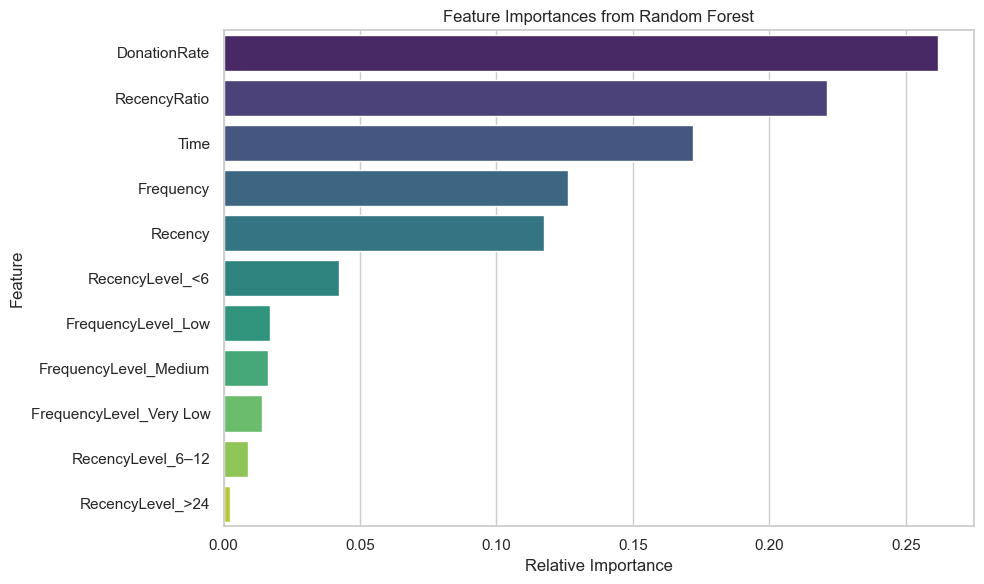

In [39]:
import numpy as np

# Estrai il modello addestrato e il preprocessor
rf_model = pipeline.named_steps['classifier']
preprocessor_fitted = pipeline.named_steps['preprocessor']

# Ottieni i nomi delle feature dopo la trasformazione
# (numeriche standardizzate + one-hot encoded categoriche)
numeric_feature_names = numeric_features
categorical_feature_names = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Estrai le importanze e costruisci DataFrame
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizza tabella ordinata
print("\nFeature Importances (Random Forest):\n")
print(importance_df.round(4))

# Visualizzazione grafica
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [42]:
from xgboost import XGBClassifier

# Pipeline con XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Fit + Evaluation
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

# Report + Confusion + AUC
print("\nXGBoost - Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_xgb).round(3))



XGBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       113
           1       0.54      0.35      0.43        37

    accuracy                           0.77       150
   macro avg       0.68      0.63      0.64       150
weighted avg       0.74      0.77      0.75       150


Confusion Matrix:

[[102  11]
 [ 24  13]]

ROC AUC Score: 0.653


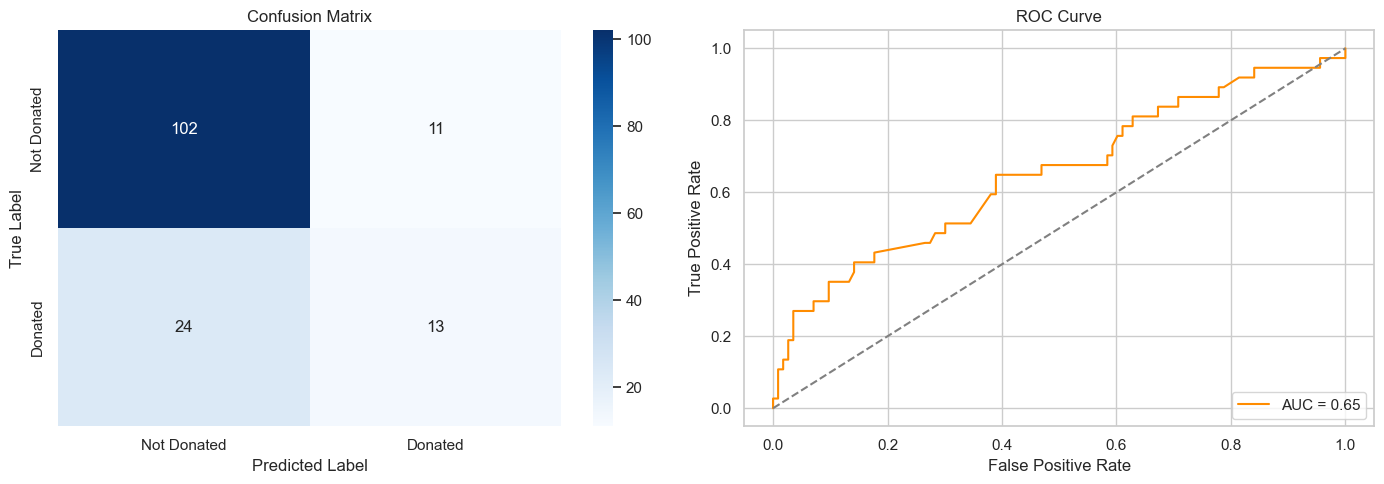

,precision,recall,f1-score,support
0,0.81,0.90,0.85,113.00
1,0.54,0.35,0.43,37.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.68,0.63,0.64,150.00
weighted avg,0.74,0.77,0.75,150.00


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd

# Esegui questo dopo aver ottenuto: y_test, y_pred_xgb, y_proba_xgb

# 1. Confusion Matrix
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Donated', 'Donated'],
            yticklabels=['Not Donated', 'Donated'],
            ax=axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)
axs[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
axs[1].plot([0, 1], [0, 1], '--', color='gray')
axs[1].set_title('ROC Curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# 3. Classification Report as styled DataFrame
report_dict = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)
report_df.style.background_gradient(cmap='YlGnBu').format("{:.2f}")


In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline con KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit + Evaluation
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

# Report + Confusion + AUC
print("\nKNN - Classification Report:\n")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_knn))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_knn).round(3))



KNN - Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       113
           1       0.42      0.35      0.38        37

    accuracy                           0.72       150
   macro avg       0.61      0.60      0.60       150
weighted avg       0.70      0.72      0.71       150


Confusion Matrix:

[[95 18]
 [24 13]]

ROC AUC Score: 0.674


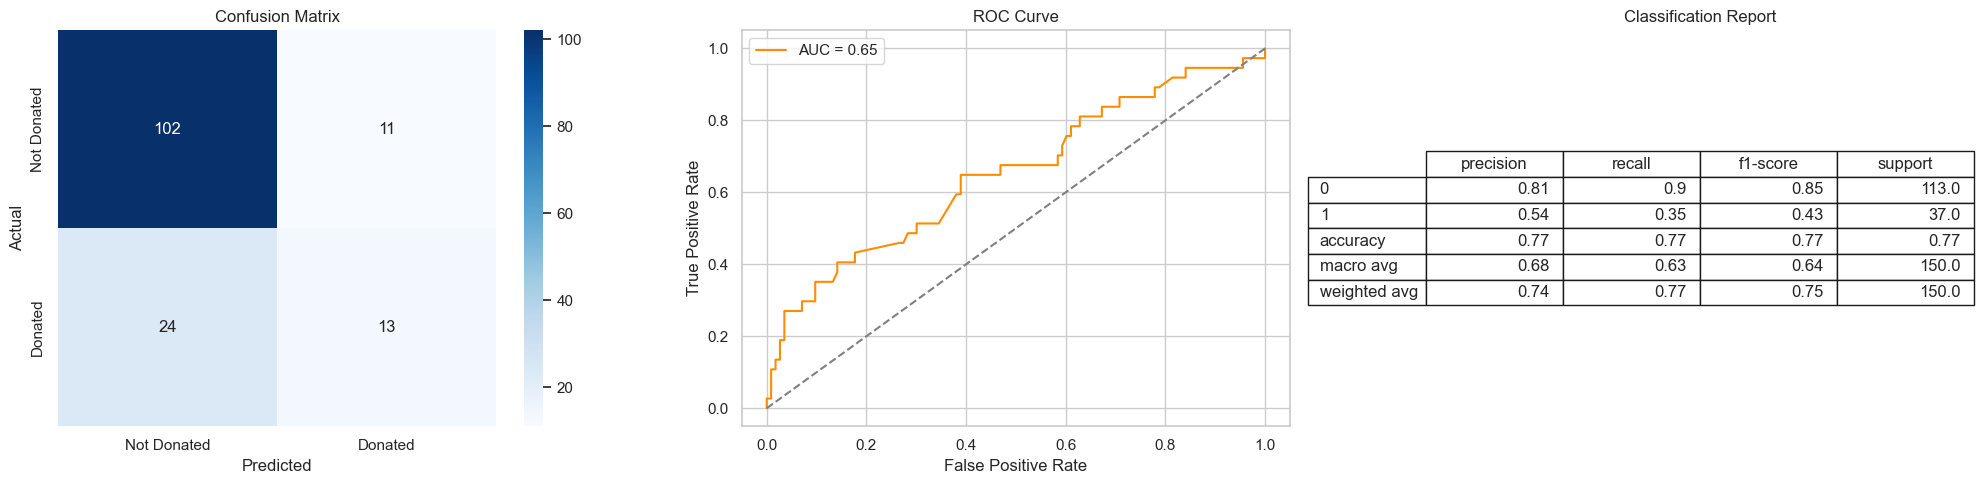

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Classification Report as DataFrame
report_dict = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
auc_score = roc_auc_score(y_test, y_proba_xgb)

# Set up figure
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 1. Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Donated', 'Donated'],
            yticklabels=['Not Donated', 'Donated'],
            ax=axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

# 2. ROC Curve
axs[1].plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1].set_title('ROC Curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend()
axs[1].grid(True)

# 3. Classification Report Table
axs[2].axis('off')
table = axs[2].table(cellText=report_df.round(2).values,
                     colLabels=report_df.columns,
                     rowLabels=report_df.index,
                     loc='center')
table.scale(1, 1.5)
axs[2].set_title('Classification Report')

plt.tight_layout()
plt.show()


In [47]:
import pandas as pd

# Valori inseriti manualmente dai report forniti
data = {
    "Model": ["Logistic Regression", "XGBoost", "KNN"],
    "Accuracy": [0.77, 0.77, 0.72],
    "Precision (1)": [0.58, 0.54, 0.42],
    "Recall (1)": [0.30, 0.35, 0.35],
    "F1-score (1)": [0.39, 0.43, 0.38],
    "ROC AUC": [0.674, 0.653, 0.674]
}

# Crea il DataFrame
comparison_df = pd.DataFrame(data)
comparison_df.set_index("Model", inplace=True)
comparison_df = comparison_df.round(3)

# Visualizzazione con gradienti
comparison_df.style.background_gradient(cmap='YlGnBu').format("{:.3f}")


,Accuracy,Precision (1),Recall (1),F1-score (1),ROC AUC
Model,,,,,
Logistic Regression,0.770,0.580,0.300,0.390,0.674
XGBoost,0.770,0.540,0.350,0.430,0.653
KNN,0.720,0.420,0.350,0.380,0.674


In [52]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Ricarica e prepara i dati se serve
file_path = r'C:\\Users\\frast\\Desktop\\blood.csv'
df = pd.read_csv(file_path)

df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']
df['Target'] = df['Target'].map({1: 0, 2: 1})
df.drop(columns=['Monetary'], inplace=True)

# Feature engineering
df['DonationRate'] = df['Frequency'] / df['Time']
df['RecencyRatio'] = df['Recency'] / df['Time']
df['RecencyLevel'] = pd.cut(df['Recency'], bins=[-1, 6, 12, 24, 100], labels=['<6', '6–12', '12–24', '>24'])
df['FrequencyLevel'] = pd.cut(df['Frequency'], bins=[0, 2, 5, 10, 50], labels=['Very Low', 'Low', 'Medium', 'High'])

# Clustering (restituiamo la colonna Cluster)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio', 'RecencyLevel', 'FrequencyLevel']
numeric_features = ['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']
categorical_features = ['RecencyLevel', 'FrequencyLevel']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

X_clust = preprocessor.fit_transform(df[features])
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_clust)


In [53]:
# Profilo medio dei cluster
cluster_profile = df.groupby('Cluster')[['Recency', 'Frequency', 'Time', 'DonationRate', 'RecencyRatio']].mean().round(2)

# Aggiunta della % di donatori per cluster
donation_rate_by_cluster = df.groupby('Cluster')['Target'].mean().round(3) * 100
cluster_profile['% Donated'] = donation_rate_by_cluster

# Aggiunta del numero di individui per cluster
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()

# Visualizzazione
cluster_profile.style.background_gradient(cmap='YlGnBu').format("{:.2f}")


,Recency,Frequency,Time,DonationRate,RecencyRatio,% Donated,Count
Cluster,,,,,,,
0,17.28,2.47,26.37,0.10,0.74,10.00,249.00
1,10.06,12.37,70.62,0.18,0.15,22.90,153.00
2,3.92,5.91,31.68,0.21,0.15,37.50,251.00
3,3.01,1.42,3.36,0.44,0.93,25.30,95.00


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ricalcola logistic regression se non lo hai già
y_pred_log = pipeline.predict(X_test)
y_proba_log = pipeline.predict_proba(X_test)[:, 1]

# Funzione per metriche
def get_metrics(model_name, y_true, y_pred, y_proba):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_proba)
    }

# Raccogli risultati
results = [
    get_metrics('Logistic Regression', y_test, y_pred_log, y_proba_log),
    get_metrics('Random Forest', y_test, y_pred, y_proba),
    get_metrics('XGBoost', y_test, y_pred_xgb, y_proba_xgb),
    get_metrics('KNN', y_test, y_pred_knn, y_proba_knn)
]

# Crea il DataFrame
metrics_df = pd.DataFrame(results)
metrics_df.set_index('Model', inplace=True)


In [59]:
# Colonne numeriche da formattare
numeric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']

# Visualizzazione elegante: format solo su colonne numeriche
metrics_df.style.format({col: "{:.3f}" for col in numeric_cols}) \
    .background_gradient(subset=numeric_cols, cmap='BuGn')


,Accuracy,Precision,Recall,F1-score,AUC,Interpretability,Training Time,Stability,Recommended Use
Model,,,,,,,,,
Logistic Regression,0.773,0.579,0.297,0.393,0.674,High,Fast,Medium,Benchmarking
Random Forest,0.773,0.579,0.297,0.393,0.674,Low,Fast,High,General purpose
XGBoost,0.767,0.542,0.351,0.426,0.653,Medium,Medium,High,High performance
KNN,0.720,0.419,0.351,0.382,0.674,Low,Fast,Low,Light deployment


In [51]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation su ogni modello (AUC)
models_cv = {
    "Logistic Regression": pipeline,
    "Random Forest": Pipeline([("preprocessor", preprocessor), ("classifier", rf_model)]),
    "XGBoost": Pipeline([("preprocessor", preprocessor), ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))]),
    "KNN": Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors=5))])
}

cv_results = []

for name, model in models_cv.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    cv_results.append({
        'Model': name,
        'CV AUC Mean': np.mean(scores),
        'CV AUC Std': np.std(scores)
    })

cv_df = pd.DataFrame(cv_results).set_index('Model')

# Visualizza risultati cross-validati
cv_df.style.background_gradient(cmap='Oranges').format("{:.3f}")


,CV AUC Mean,CV AUC Std
Model,,
Logistic Regression,0.533,0.119
Random Forest,0.533,0.119
XGBoost,0.542,0.096
KNN,0.547,0.144
